In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'custom-filename.svg',
 'GSE28497 - Classifying Leukemia Cancer Types.ipynb',
 'GSE28497 - Modeling.ipynb',
 'GSE28497_cleaned.csv',
 'GSE71935 - Testing.ipynb',
 'Leukemia_GSE28497.csv',
 'Leukemia_GSE71935.csv']

In [3]:
df = pd.read_csv('GSE28497_cleaned.csv', index_col=0)
df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
GSM705467,ALL,7.409521,5.009216,4.173607,7.315369,3.185411,7.620644,3.731541,3.471587,4.167374,...,2.968822,3.223820,11.968681,12.100004,3.457507,2.967138,2.790814,2.563377,2.860505,2.608381
GSM705468,ALL,7.177109,5.415108,4.426778,7.550818,3.134181,7.685723,3.907953,3.650995,3.860015,...,2.982888,3.690411,12.318004,12.486741,3.396412,3.109629,2.856499,2.603355,2.908509,2.634063
GSM705469,ALL,6.564918,5.248020,4.252414,7.175169,3.017718,7.956261,3.354557,3.302989,3.335324,...,2.897425,3.611584,11.748222,11.807578,3.265585,3.057079,2.724642,2.440532,2.626871,2.673293
GSM705470,ALL,6.872028,5.155963,4.388849,7.365933,3.031735,7.830002,3.508926,3.412491,3.439769,...,3.024722,3.713087,12.208588,12.148604,3.175092,2.896168,2.798296,2.522343,2.762835,2.624163
GSM705471,ALL,7.402105,5.509826,4.284291,7.214947,2.925269,7.789838,3.610425,3.362593,3.412095,...,3.259802,4.096010,11.641305,11.713311,3.507025,3.119397,2.761294,2.546541,2.748511,2.738165


In [4]:
df.type.value_counts()

ALL               74
ALL_ETV6-RUNX1    53
ALL_HYPERDIP      51
ALL_T-ALL         46
ALL_TCF3-PBX1     22
ALL_HYPO          18
ALL_MLL           17
Name: type, dtype: int64

In [5]:
X = df.drop('type', axis=1)
y = df.type

#### The goal is to try and iterate over all 22284 genes and find the most promising biomarkers for each type of cancer. First find the best model and then from there we will try to find the best features (biomarkers)

In [7]:
#Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#Scale our data
ss = StandardScaler().fit(X_train)
X_tr_scaled = ss.transform(X_train)
X_ts_scaled = ss.transform(X_test)

In [20]:
clf1 = LogisticRegression(penalty='l1', solver='liblinear')
clf2 = LogisticRegression(solver='newton-cg')
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf4 = RandomForestClassifier(max_depth=10, n_estimators=20)
clf5 = AdaBoostClassifier()
clf6 = SVC(kernel='sigmoid', C=0.01, gamma='scale')
clf7 = SVC(kernel='linear', C=0.01)

classifiers = [('Lasso LogReg',clf1),
               ('LogReg',clf2),
               ('Decision Tree', clf3),
               ('Random Forest', clf4),
               ('AdaBoost',clf5),
               ('Sigmoid SVC',clf6),
              ('Linear SVC',clf7)]

scores = {}
for name, clf in classifiers:
    clf.fit(X_tr_scaled, y_train)
    scores[name] = clf.score(X_ts_scaled, y_test)

scores

{'Lasso LogReg': 0.8873239436619719,
 'LogReg': 0.8873239436619719,
 'Decision Tree': 0.8028169014084507,
 'Random Forest': 0.8450704225352113,
 'AdaBoost': 0.4788732394366197,
 'Sigmoid SVC': 0.2676056338028169,
 'Linear SVC': 0.8732394366197183}

In [21]:
n_genes = [1000,6000,10000,22284]

scores = {}
for num in n_genes:
    if num == 22284:
        X_small = X
    else:
        X_small = X.sample(num, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size=0.25, random_state=42, stratify=y)
    X_tr_scaled = StandardScaler().fit_transform(X_train)
    X_ts_scaled = StandardScaler().fit_transform(X_test)
    
    for name, clf in zip(['Lasso LogReg','Linear SVC'],[clf1,clf7]):
        clf.fit(X_tr_scaled, y_train)
        scores[name] = clf.score(X_ts_scaled, y_test)
    print(scores)

{'Lasso LogReg': 0.8873239436619719, 'Linear SVC': 0.8591549295774648}
{'Lasso LogReg': 0.8450704225352113, 'Linear SVC': 0.8732394366197183}
{'Lasso LogReg': 0.9014084507042254, 'Linear SVC': 0.8591549295774648}
{'Lasso LogReg': 0.8732394366197183, 'Linear SVC': 0.8873239436619719}


In [22]:
from sklearn.decomposition import PCA
pca = PCA()
X_reduced = pca.fit_transform(StandardScaler().fit_transform(X))


X2_train, X2_test, y2_train, y2_test = train_test_split(X_reduced, y, test_size=0.25, random_state=42, stratify=y)

scores = {}
for name, clf in zip(['Lasso LogReg','Linear SVC'],[clf1,clf7]):
    clf.fit(X_tr_scaled, y_train)
    scores[name] = clf.score(X_ts_scaled, y_test)
print(scores)

{'Lasso LogReg': 0.8732394366197183, 'Linear SVC': 0.8873239436619719}


In [75]:
list1 = df.type
list2 = df.type.astype('category').cat.codes
di = dict(zip(list1,list2))
y_codes = df.type.replace(di)
di

{'ALL': 0,
 'ALL_TCF3-PBX1': 6,
 'ALL_HYPERDIP': 2,
 'ALL_HYPO': 3,
 'ALL_MLL': 4,
 'ALL_T-ALL': 5,
 'ALL_ETV6-RUNX1': 1}

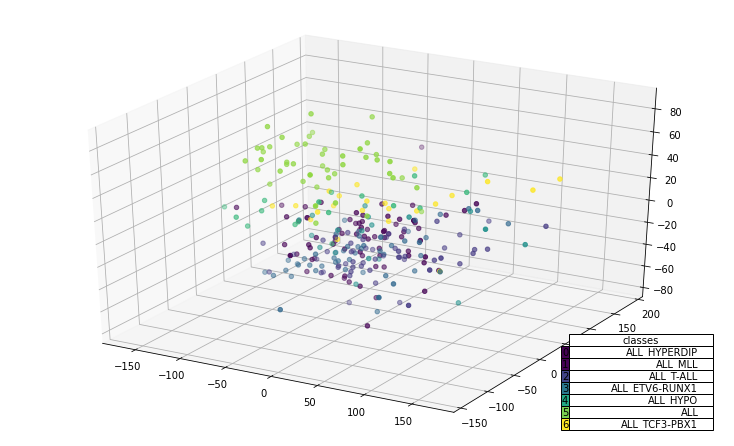

In [167]:
pca2 = PCA(n_components=3)
X2_scaled = StandardScaler().fit_transform(X)
X2_reduced = pca2.fit_transform(X2_scaled)

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(10,6))
ax = Axes3D(fig)
_ = ax.scatter(X2_reduced[:,0], X2_reduced[:,1],X2_reduced[:,2], c=y_codes)
unique_classes = list(set(di.values()))
keys = list(set(di.keys()))
cmap = plt.cm.get_cmap("viridis",6)
_ = plt.table(cellText=[[key] for key in keys], loc='lower right',
          colWidths=[0.2], rowColours=cmap(np.array(unique_classes)-1), rowLabels=[x for x in unique_classes],
          colLabels=['classes'])

plt.savefig('PCA (n_components = 3).png')

In [162]:
unique_classes = list(set(di.values()))
print(unique_classes)
for color in unique_classes:
    for key, value in di.items():
        if value == color:
            print(key)
#[key for key, value in di.items() if value == unique_classes[5]][0]
keys2 = sorted(list(set(di.keys())))
print(keys2)

[0, 1, 2, 3, 4, 5, 6]
ALL
ALL_ETV6-RUNX1
ALL_HYPERDIP
ALL_HYPO
ALL_MLL
ALL_T-ALL
ALL_TCF3-PBX1
['ALL', 'ALL_ETV6-RUNX1', 'ALL_HYPERDIP', 'ALL_HYPO', 'ALL_MLL', 'ALL_T-ALL', 'ALL_TCF3-PBX1']


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(10,6))
ax = Axes3D(fig)
for color in unique_classes:
    _ = ax.scatter(X2_reduced[:,0], X2_reduced[:,1],X2_reduced[:,2],c=color)

ax.legend(unique_classes, keys2)

In [42]:
coefdict = {}
for i, array in zip(range(4), np.array_split(X, 4, axis=1)):
    X_train, X_test, y_train, y_test = train_test_split(array, y, test_size=0.25, random_state=42, stratify=y)
    ss = StandardScaler().fit(X_train)
    X_tr_scaled = ss.transform(X_train)
    X_ts_scaled = ss.transform(X_test)
    
    logreg_model = clf1.fit(X_tr_scaled, y_train)
    coefdict[str(i)] = pd.DataFrame(abs(logreg_model.coef_).T, index = X_train.columns)

coefdict.keys()

dict_keys(['0', '1', '2', '3'])

In [103]:
genes_list = []
for keys, values in coefdict.items():
    for col in values.columns:
        mask = values[[col]].apply(lambda x: x >= 0.1, axis=1)
        temp = values[[col]][mask]
        genes_list += list(temp.index)

In [104]:
temp1 = np.unique(genes_list)
len(temp1)

22283

In [169]:
genes_list1 = []
for key, values in coefdict.items():
    temp = coefdict[key]
    for col in temp.columns:
        mask = temp.iloc[:,0] > 0.001
        genes_list1 += list(temp[mask].index)
genes_list2 = np.unique(genes_list1)
len(genes_list2)

372

In [170]:
X_new = X[genes_list2]
X4_train, X4_test, y4_train, y4_test = train_test_split(X_new, y, test_size=0.25, random_state=4, stratify=y)
ss = StandardScaler().fit(X4_train)
X4_scaled = ss.transform(X4_train)
X4_scaled_test = ss.transform(X4_test)
lg_model2 = clf1.fit(X4_scaled,y4_train)
print('Logistic Regression: ', lg_model2.score(X4_scaled_test, y4_test))
svm_model2 = clf7.fit(X4_scaled, y4_train)
print('Linear SVM: ', svm_model2.score(X4_scaled_test, y4_test))


predicted = lg_model2.predict(X4_scaled_test)
predicted2 = svm_model2.predict(X4_scaled_test)
df_pred = pd.concat([y4_test.reset_index(), pd.Series(predicted), pd.Series(predicted2)],axis=1)
df_pred = df_pred.rename(columns={0:'Predicted by Lasso LogReg',1:'Predicted by Linear SVC'})

Logistic Regression:  0.8732394366197183
Linear SVM:  0.8873239436619719


In [171]:
df_pred[df_pred.type != df_pred['Predicted by Lasso LogReg']]

,samples,type,Predicted by Lasso LogReg,Predicted by Linear SVC
2,GSM705831,ALL,ALL_HYPO,ALL
12,GSM705679,ALL_HYPO,ALL,ALL
16,GSM705666,ALL_HYPO,ALL_HYPERDIP,ALL
22,GSM705683,ALL_HYPO,ALL,ALL_HYPO
28,GSM705548,ALL_HYPERDIP,ALL_HYPO,ALL_HYPO
31,GSM705520,ALL_TCF3-PBX1,ALL,ALL
38,GSM705536,ALL_HYPERDIP,ALL,ALL_HYPERDIP
63,GSM705601,ALL_HYPERDIP,ALL,ALL_HYPERDIP
68,GSM706003,ALL_ETV6-RUNX1,ALL,ALL


In [172]:
df_pred[df_pred.type != df_pred['Predicted by Linear SVC']]

,samples,type,Predicted by Lasso LogReg,Predicted by Linear SVC
12,GSM705679,ALL_HYPO,ALL,ALL
16,GSM705666,ALL_HYPO,ALL_HYPERDIP,ALL
28,GSM705548,ALL_HYPERDIP,ALL_HYPO,ALL_HYPO
31,GSM705520,ALL_TCF3-PBX1,ALL,ALL
57,GSM705833,ALL,ALL,ALL_HYPO
64,GSM705821,ALL,ALL,ALL_HYPERDIP
67,GSM705695,ALL_MLL,ALL_MLL,ALL_HYPERDIP
68,GSM706003,ALL_ETV6-RUNX1,ALL,ALL


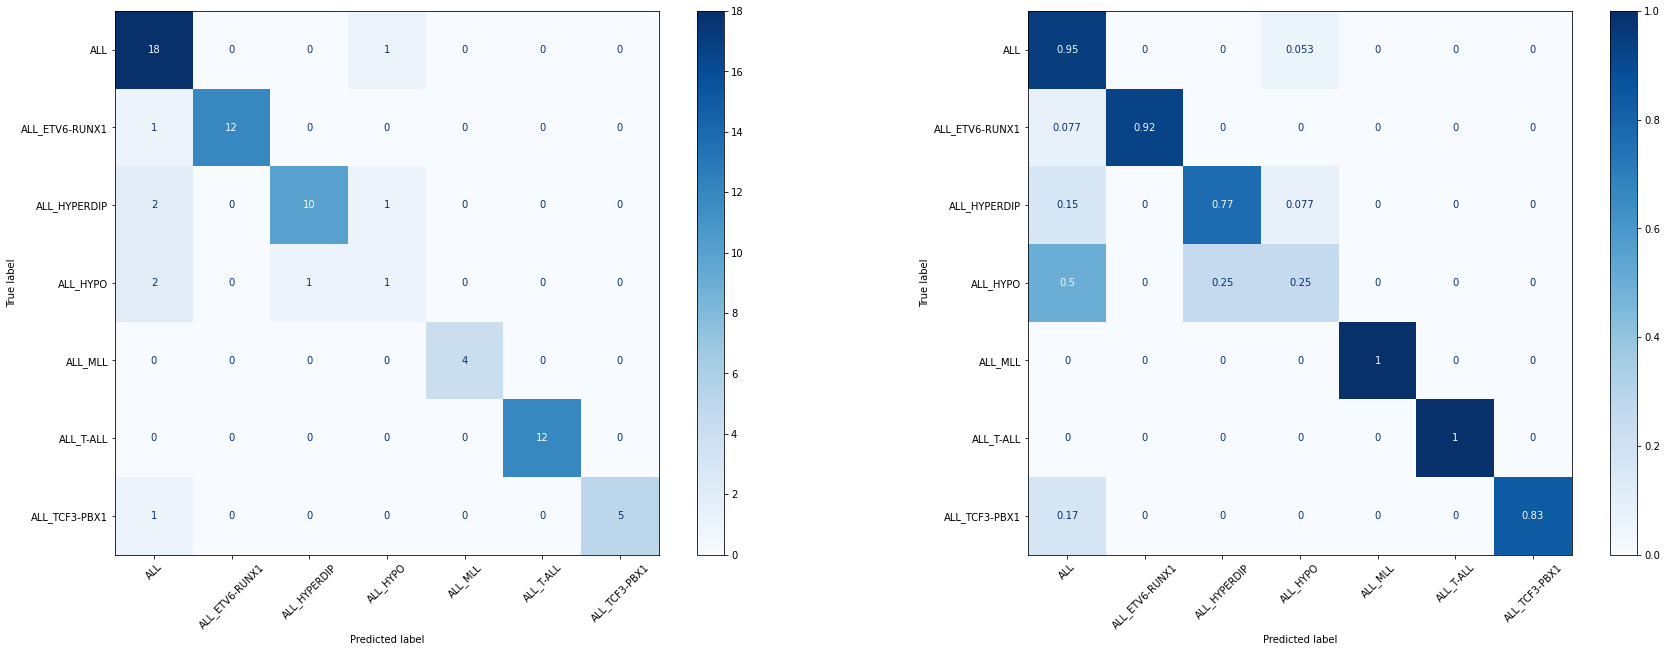

In [176]:
from sklearn.metrics import plot_confusion_matrix
classes = np.unique(y)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,10))
_ = plot_confusion_matrix(lg_model2, X4_scaled_test, y4_test,
                      display_labels=classes, cmap=plt.cm.Blues, ax=ax1, xticks_rotation=45)
_ = plot_confusion_matrix(lg_model2, X4_scaled_test, y4_test,
                      display_labels=classes, cmap=plt.cm.Blues, ax=ax2, xticks_rotation=45,
                          normalize='true')
plt.savefig('LassoLogReg_confusion_mat.png')
plt.show()


In [26]:
for array in np.array_split(X, 4, axis=1):
    print(array.shape)

(281, 5571)
(281, 5571)
(281, 5571)
(281, 5570)


In [61]:
practicedict = {}
for name, array in zip(['A','B','C','D'], np.array_split(X, 4, axis=1)):
    practicedict[name] = array

In [64]:
clf1 = LogisticRegression(penalty='l1', solver='liblinear')
X3 = pd.concat([practicedict['B'],practicedict['C']],axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(practicedict['C'], y, test_size=0.25, random_state=4, stratify=y)
ss = StandardScaler().fit(X3_train)
X3_scaled = ss.transform(X3_train)
X3_scaled_test = ss.transform(X3_test)
lg_model = clf1.fit(X3_scaled,y3_train)
print(lg_model.score(X3_scaled_test, y3_test))
coef = pd.DataFrame(abs(lg_model.coef_).T, index = X3_train.columns)
coef.describe()

0.8732394366197183


,0,1,2,3,4,5,6
count,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000
mean,0.002703,0.001303,0.001528,0.001601,0.000790,0.000848,0.000468
std,0.029834,0.019611,0.020827,0.019431,0.016153,0.015031,0.024770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.817519,0.688975,0.587761,0.566473,0.630890,0.451037,1.397590


In [118]:
svm_model = clf7.fit(X3_scaled,y3_train)
print(svm_model.score(X3_scaled_test,y3_test))

0.8873239436619719


In [119]:
dict02 = {}
X3 = pd.concat([practicedict['B'],practicedict['C']],axis=1)
for name, array in zip(['A1','B1','C1','D1'], np.array_split(X3, 4, axis=1)):
    dict02[name] = array

In [132]:
clf1 = LogisticRegression(penalty='l1', solver='liblinear')

for key, value in dict02.items():
    X_train, X_test, y_train, y_test = train_test_split(dict02[key], y, test_size=0.25, random_state=4, stratify=y)
    ss = StandardScaler().fit(X_train)
    X_scaled = ss.transform(X_train)
    X_scaled_test = ss.transform(X_test)
    lg_model = clf1.fit(X_scaled,y_train)
    print(lg_model.score(X_scaled_test, y_test))

0.8732394366197183
0.8873239436619719
0.8873239436619719
0.8450704225352113


0.9154929577464789


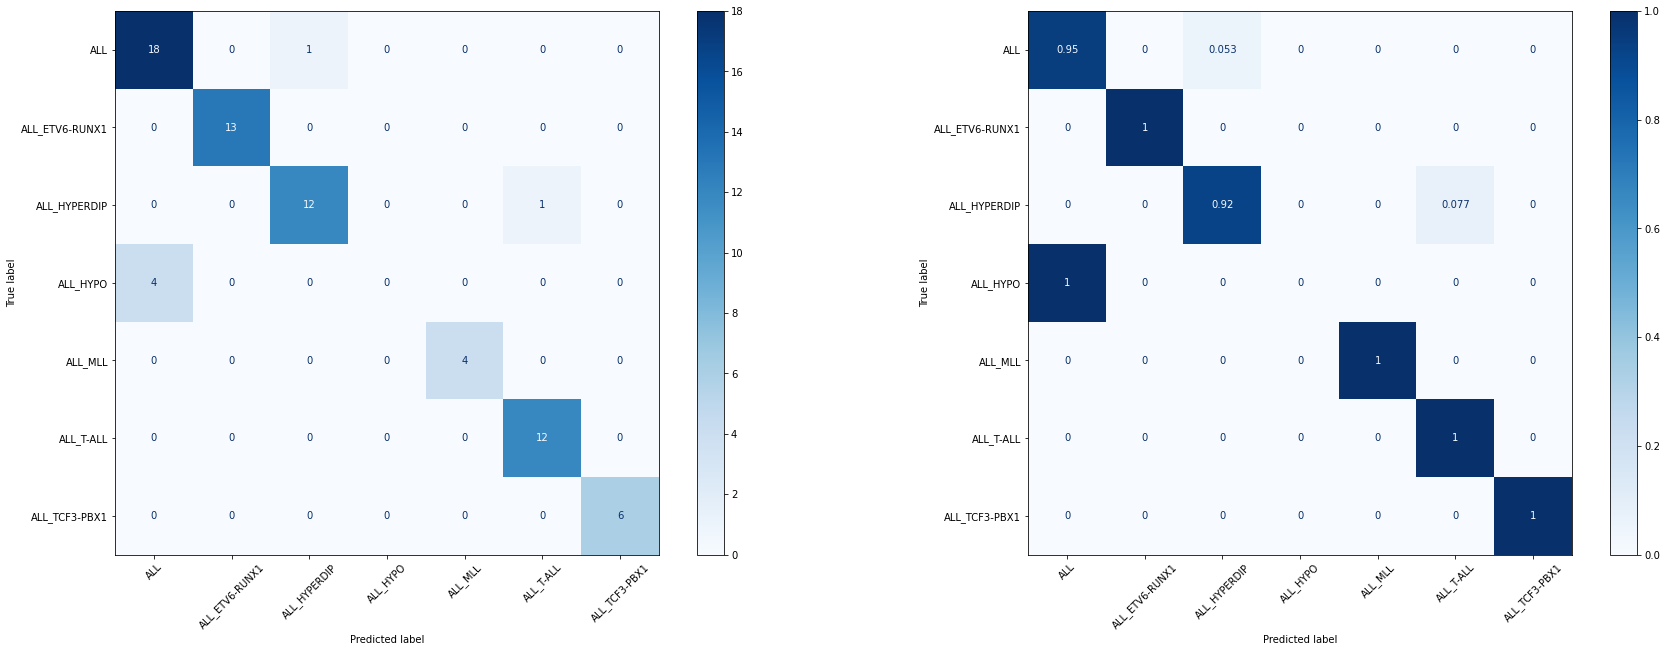

In [182]:
X4 = pd.concat([dict02['B1'],dict02['C1']],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.25, stratify=y)
ss = StandardScaler().fit(X_train)
X_scaled = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)
lg_model = clf1.fit(X_scaled,y_train)
print(lg_model.score(X_scaled_test, y_test))
classes = np.unique(y)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,10))
_ = plot_confusion_matrix(lg_model, X_scaled_test, y_test,
                      display_labels=classes, cmap=plt.cm.Blues, ax=ax1, xticks_rotation=45)
_ = plot_confusion_matrix(lg_model, X_scaled_test, y_test,
                      display_labels=classes, cmap=plt.cm.Blues, ax=ax2, xticks_rotation=45,
                          normalize='true')
plt.show()

In [128]:
svm_model = clf7.fit(X_scaled,y_train)
print(svm_model.score(X_scaled_test,y_test))

0.8873239436619719


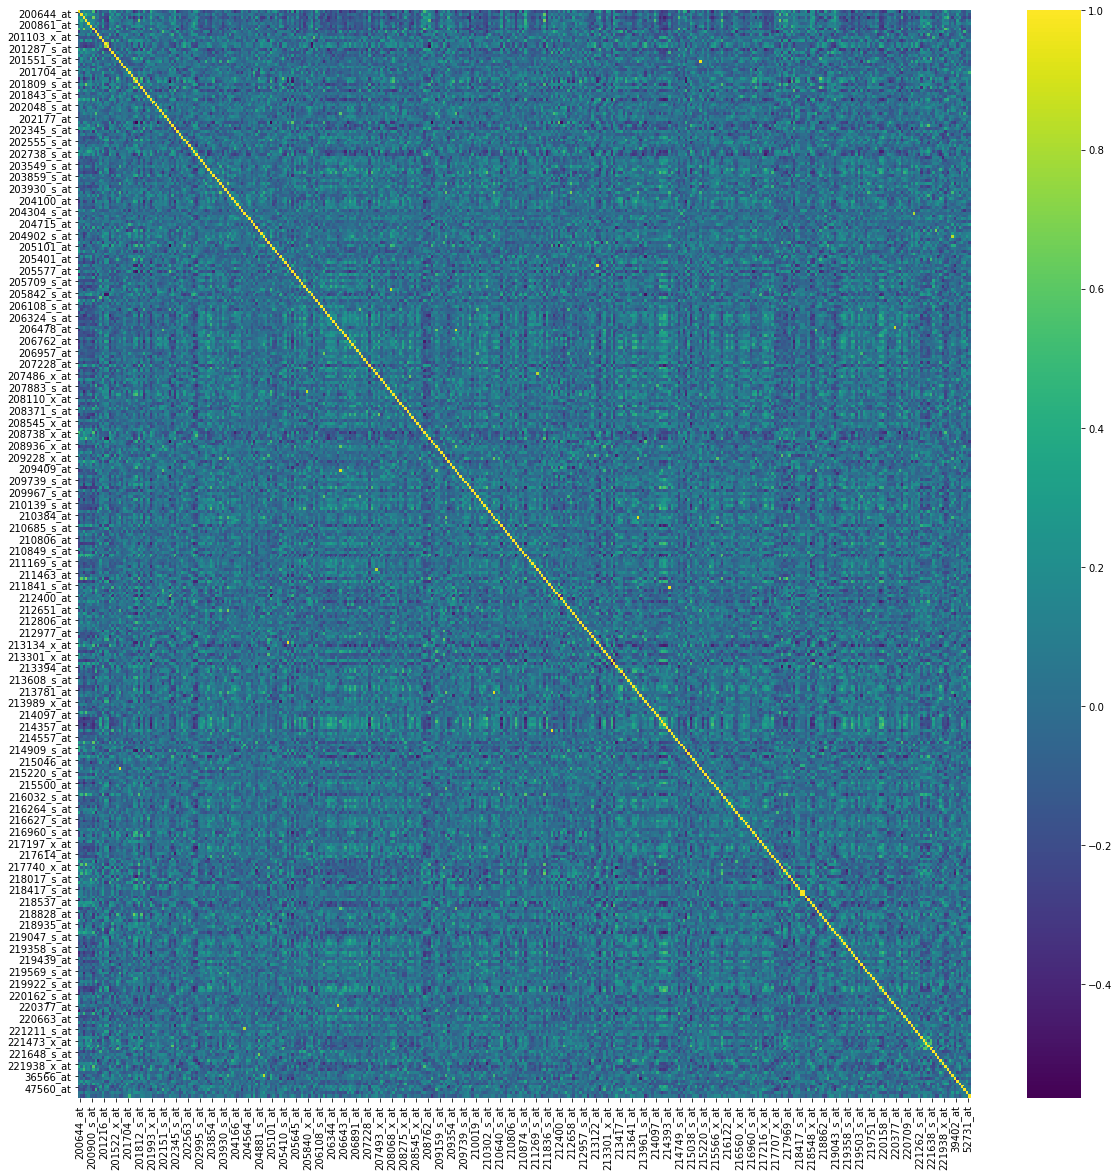

In [73]:
corr_mat = X_new.corr()
fig = plt.figure(figsize=(20,20))
_ = sns.heatmap(corr_mat, cmap='viridis')

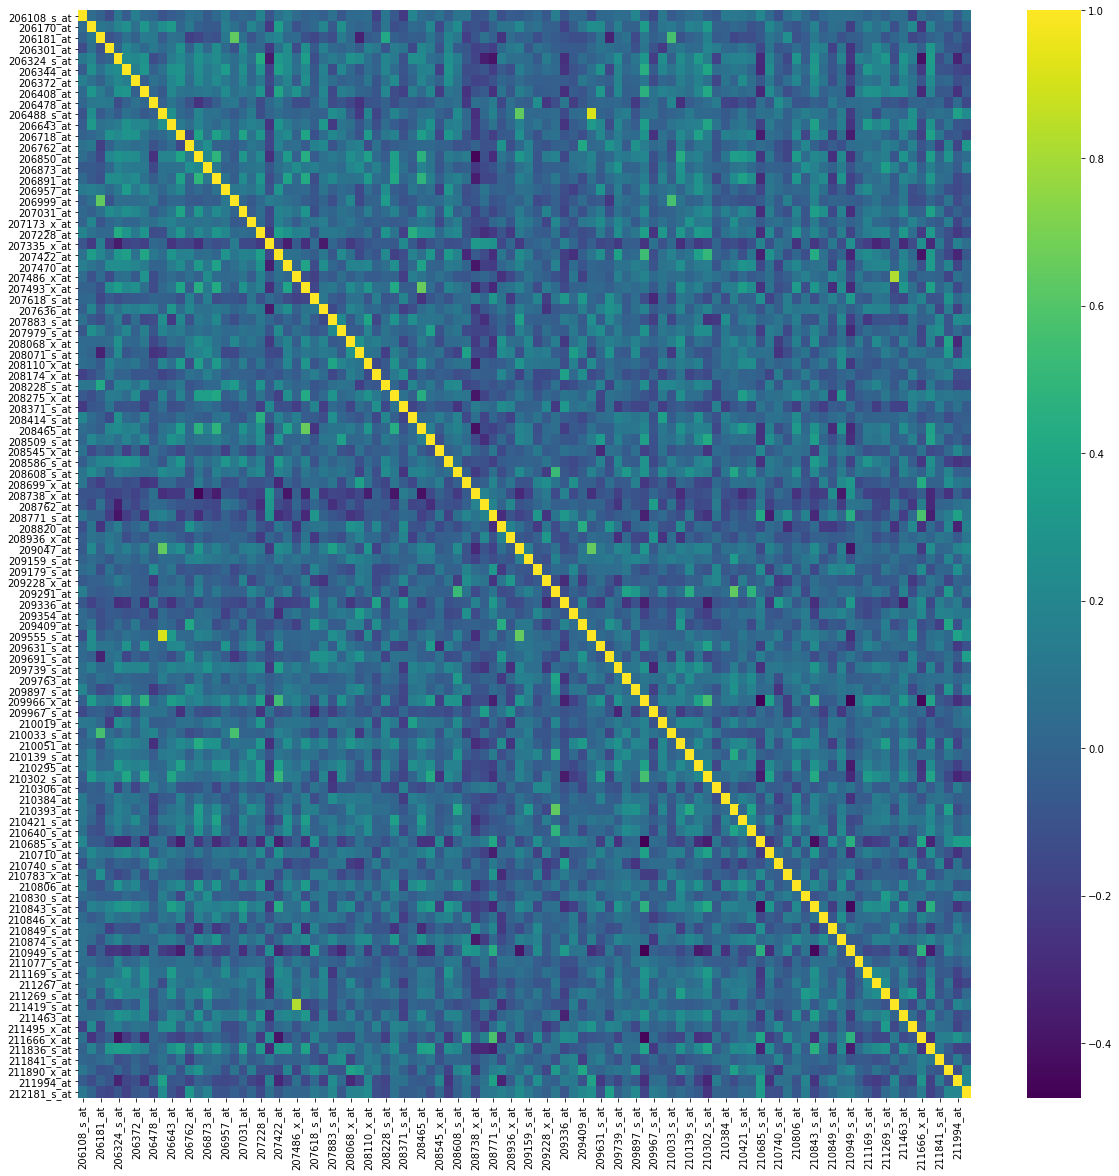

In [115]:
X_hist = X_new.iloc[:,100:200]
corr_mat1 = X_hist.corr()
fig = plt.figure(figsize=(20,20))
_ = sns.heatmap(corr_mat1, cmap='viridis')
plt.savefig('heatmap_gene100_to_gene200_of372.png')